In [1]:
# import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import OneClassSVM
from sklearn.model_selection import ParameterGrid
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

In [2]:
clean_data = pd.read_csv('new_df_withoutmissing.csv')
clean_data

,Unnamed: 0,Account No,Balance,Amount,Third Party Account No,Third Party Name,DateTime
0,0,678330503.0,2971.000000,1584.00,NaN,Westport Care Home,2023-01-01 00:00:00
1,1,472213568.0,3792.000000,1950.00,NaN,Barbiee Boutique,2023-01-01 00:00:00
2,2,472213568.0,3012.000000,-780.00,283027736.0,NaN,2023-01-01 00:00:00
3,3,283027736.0,1787.000000,780.00,472213568.0,NaN,2023-01-01 00:00:00
4,4,624500124.0,3226.000000,1825.00,NaN,Fat Face,2023-01-01 00:00:00
...,...,...,...,...,...,...,...
230190,230190,581655972.0,45935.206861,-41.06,NaN,Tesco,2023-12-06 20:54:00
230191,230191,786141370.0,-244.837500,-62.35,NaN,Sainsbury Local,2023-12-06 20:55:00
230192,230192,824916823.0,9709.172159,-32.94,NaN,Deliveroo,2023-12-06 21:05:00
230193,230193,366550080.0,26834.165794,-19.25,NaN,Amazon,2023-12-06 21:13:00


In [3]:
clean_data.isnull().sum()

Unnamed: 0                     0
Account No                     0
Balance                        0
Amount                         0
Third Party Account No    223360
Third Party Name            6835
DateTime                       0
dtype: int64

In [4]:
clean_data = clean_data.drop(['Unnamed: 0', 'Third Party Account No'], axis=1)

In [5]:
data = clean_data.dropna()
data

,Account No,Balance,Amount,Third Party Name,DateTime
0,678330503.0,2971.000000,1584.00,Westport Care Home,2023-01-01 00:00:00
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,2023-01-01 00:00:00
4,624500124.0,3226.000000,1825.00,Fat Face,2023-01-01 00:00:00
5,203466392.0,4607.660000,2841.66,Lavender Primary,2023-01-01 00:00:00
6,768271776.0,3620.000000,1950.00,A Cut Above,2023-01-01 00:00:00
...,...,...,...,...,...
230190,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54:00
230191,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55:00
230192,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05:00
230193,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13:00


In [7]:
df = pd.DataFrame(data)

zero_amount_df = df[df['Amount'] == 0]

zero_amount_df

,Account No,Balance,Amount,Third Party Name,DateTime
124098,950234174.0,776.302067,-0.0,Selfridges,2023-07-11 08:21:00
132563,738958551.0,5564.249325,-0.0,Amazon,2023-07-29 18:32:00
134276,730002588.0,12939.954627,-0.0,Fat Face,2023-07-31 17:42:00
146717,581655972.0,34362.247639,-0.0,Fitted Stitch,2023-08-15 05:45:00
168830,322221939.0,3186.856806,-0.0,Revella,2023-09-16 08:04:00
192978,912705941.0,17527.347189,-0.0,Tesco,2023-10-21 05:41:00
197832,520447032.0,7416.909870,-0.0,Lloyds Pharmacy,2023-10-30 09:22:00
213034,824916823.0,8591.033140,-0.0,Sainsbury Local,2023-11-16 05:47:00
219994,687135796.0,28698.757249,-0.0,Sainsbury,2023-11-29 07:29:00


In [8]:
df

,Account No,Balance,Amount,Third Party Name,DateTime
0,678330503.0,2971.000000,1584.00,Westport Care Home,2023-01-01 00:00:00
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,2023-01-01 00:00:00
4,624500124.0,3226.000000,1825.00,Fat Face,2023-01-01 00:00:00
5,203466392.0,4607.660000,2841.66,Lavender Primary,2023-01-01 00:00:00
6,768271776.0,3620.000000,1950.00,A Cut Above,2023-01-01 00:00:00
...,...,...,...,...,...
230190,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54:00
230191,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55:00
230192,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05:00
230193,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13:00


In [9]:
data['Third Party Name'].unique()

array(['Westport Care Home', 'Barbiee Boutique', 'Fat Face',
       'Lavender Primary', 'A Cut Above', 'Tesco', 'Brilliant Brushes',
       'Costa Coffee', 'Premier Finance', 'North Face', 'Craftastic',
       'Fitted Stitch', 'Selfridges', 'Starbucks', 'The Crown',
       'Cass Art', 'Green Park Academy', 'Rose & Crown', 'Kings Arms',
       'Sunny Care Nursery', 'A Yarn Story', 'Pets Corner',
       'Lavender Fields', 'Victoria Park', 'Halifax', 'LBG', 'Blizzard',
       'Xbox', 'Mojang Studios', 'PureGym', 'Disney', 'Netflix',
       'Grand Union BJJ', 'Amazon', 'SquareOnix', 'Deliveroo', 'JustEat',
       'Coop Local', 'Sainsbury', 'AMAZON', 'The Works', "Blackwell's",
       'Topshop', 'Matalan', 'Foyles', 'Wool', 'Hobby Lobby', 'Revella',
       'Sainsbury Local', 'Loosely Fitted', 'Stitch By Stitch',
       'Coffee #1', 'Hobbycraft', 'Lloyds Pharmacy', 'Gamestation', 'CeX',
       'Etsy', 'Five Senses Art', 'Sports Direct', 'Boots', 'Reebok',
       'JD Sports', 'Head', 'Frankie

In [10]:
holiday_data = {
    'date': ['2025-01-01', '2025-04-18', '2025-12-25', '2025-12-26', '2025-04-18', '2025-04-21', '2025-05-05', '2025-05-26', '2025-08-25'],
    'holiday': ['New Year\'s Day', 'Good Friday', 'Christmas Day', 'Boxing Day', 'Good Friday', 'Easter Monday', 'Early May bank holiday', 'Spring bank holiday', 'Summer bank holiday']
}
df_holidays = pd.DataFrame(holiday_data)
df_holidays

,date,holiday
0,2025-01-01,New Year's Day
1,2025-04-18,Good Friday
2,2025-12-25,Christmas Day
3,2025-12-26,Boxing Day
4,2025-04-18,Good Friday
5,2025-04-21,Easter Monday
6,2025-05-05,Early May bank holiday
7,2025-05-26,Spring bank holiday
8,2025-08-25,Summer bank holiday


In [11]:
df_holidays['date'] = pd.to_datetime(df_holidays['date'])
df_holidays['month_day'] = df_holidays['date'].dt.strftime('%m-%d')

data['DateTime'] = pd.to_datetime(data['DateTime'])
data['month_day'] = data['DateTime'].dt.strftime('%m-%d')

df_holidays = df_holidays.drop_duplicates(subset=['month_day'])

data['Holiday'] = data['month_day'].map(df_holidays.set_index('month_day')['holiday'])

data

/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_78431/480043795.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DateTime'] = pd.to_datetime(data['DateTime'])
/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_78431/480043795.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month_day'] = data['DateTime'].dt.strftime('%m-%d')
/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_78431/480043795.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

,Account No,Balance,Amount,Third Party Name,DateTime,month_day,Holiday
0,678330503.0,2971.000000,1584.00,Westport Care Home,2023-01-01 00:00:00,01-01,New Year's Day
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,2023-01-01 00:00:00,01-01,New Year's Day
4,624500124.0,3226.000000,1825.00,Fat Face,2023-01-01 00:00:00,01-01,New Year's Day
5,203466392.0,4607.660000,2841.66,Lavender Primary,2023-01-01 00:00:00,01-01,New Year's Day
6,768271776.0,3620.000000,1950.00,A Cut Above,2023-01-01 00:00:00,01-01,New Year's Day
...,...,...,...,...,...,...,...
230190,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54:00,12-06,NaN
230191,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55:00,12-06,NaN
230192,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05:00,12-06,NaN
230193,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13:00,12-06,NaN


In [12]:
data.fillna(False)

,Account No,Balance,Amount,Third Party Name,DateTime,month_day,Holiday
0,678330503.0,2971.000000,1584.00,Westport Care Home,2023-01-01 00:00:00,01-01,New Year's Day
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,2023-01-01 00:00:00,01-01,New Year's Day
4,624500124.0,3226.000000,1825.00,Fat Face,2023-01-01 00:00:00,01-01,New Year's Day
5,203466392.0,4607.660000,2841.66,Lavender Primary,2023-01-01 00:00:00,01-01,New Year's Day
6,768271776.0,3620.000000,1950.00,A Cut Above,2023-01-01 00:00:00,01-01,New Year's Day
...,...,...,...,...,...,...,...
230190,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54:00,12-06,False
230191,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55:00,12-06,False
230192,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05:00,12-06,False
230193,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13:00,12-06,False


In [13]:
def check_holiday(holiday):
    if isinstance(holiday, str):
        return True
    else:
        return False

# appply the function to the 'Holiday' column
data['Holiday'] = data['Holiday'].apply(check_holiday)

data

/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_78431/3041737322.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Holiday'] = data['Holiday'].apply(check_holiday)


,Account No,Balance,Amount,Third Party Name,DateTime,month_day,Holiday
0,678330503.0,2971.000000,1584.00,Westport Care Home,2023-01-01 00:00:00,01-01,True
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,2023-01-01 00:00:00,01-01,True
4,624500124.0,3226.000000,1825.00,Fat Face,2023-01-01 00:00:00,01-01,True
5,203466392.0,4607.660000,2841.66,Lavender Primary,2023-01-01 00:00:00,01-01,True
6,768271776.0,3620.000000,1950.00,A Cut Above,2023-01-01 00:00:00,01-01,True
...,...,...,...,...,...,...,...
230190,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54:00,12-06,False
230191,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55:00,12-06,False
230192,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05:00,12-06,False
230193,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13:00,12-06,False


In [14]:
data

,Account No,Balance,Amount,Third Party Name,DateTime,month_day,Holiday
0,678330503.0,2971.000000,1584.00,Westport Care Home,2023-01-01 00:00:00,01-01,True
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,2023-01-01 00:00:00,01-01,True
4,624500124.0,3226.000000,1825.00,Fat Face,2023-01-01 00:00:00,01-01,True
5,203466392.0,4607.660000,2841.66,Lavender Primary,2023-01-01 00:00:00,01-01,True
6,768271776.0,3620.000000,1950.00,A Cut Above,2023-01-01 00:00:00,01-01,True
...,...,...,...,...,...,...,...
230190,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54:00,12-06,False
230191,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55:00,12-06,False
230192,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05:00,12-06,False
230193,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13:00,12-06,False


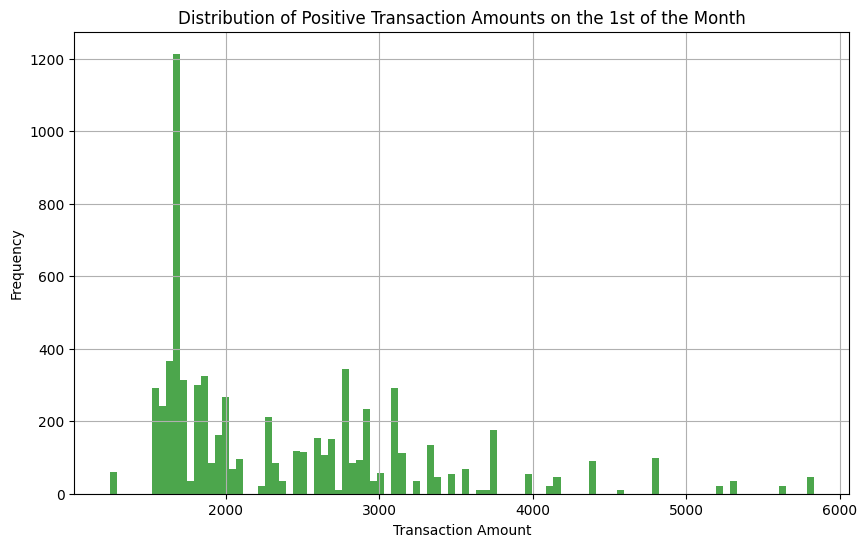

2300.0

In [15]:
# filter to consider only positive transaction amounts on the 1st as it potential to be salary
positive_transactions_on_first = data[data['Amount'] > 0]

# plot the distribution of positive transaction amounts on the 1st
plt.figure(figsize=(10, 6))
plt.hist(positive_transactions_on_first['Amount'], bins=100, color='green', alpha=0.7)
plt.title('Distribution of Positive Transaction Amounts on the 1st of the Month')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# calculate the 58th percentile of positive transaction amounts on the 1st as a potential threshold for salary identification
positive_threshold = positive_transactions_on_first['Amount'].quantile(0.58) # from graph of Don said 28,400 is med of income so i devined it into 12
positive_threshold


In [16]:
# filer data for transactions on the 1st day that are above the threshold
potential_salaries = data[(data['DateTime'].dt.day == 1) & (data['Amount'] > positive_threshold)]

# group by account and month to see if these transactions occur consistently
salary_by_account = potential_salaries.groupby('Account No').apply(lambda x: x['DateTime'].dt.month.unique())

consistent_salary_accounts = salary_by_account[salary_by_account.apply(len) >= 3]  # cutoff of at least 3 months

consistent_salary_accounts.head(), len(consistent_salary_accounts)


(Account No
 124125096.0    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
 131388684.0    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
 137822385.0    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
 147474476.0    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
 151968462.0    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
 dtype: object,
 96)

In [17]:
salary_account_numbers = set(consistent_salary_accounts.index)
def flag_salary(row):
    if (row['Account No'] in salary_account_numbers) and (row['DateTime'].day == 1) and (row['Amount'] > positive_threshold):
        return True
    return False

data['Is_Salary'] = data.apply(flag_salary, axis=1)

data[['Account No', 'DateTime', 'Amount', 'Is_Salary']].head(10), data[['Account No', 'DateTime', 'Amount', 'Is_Salary']].tail(10)



/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_78431/527230990.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Is_Salary'] = data.apply(flag_salary, axis=1)


(     Account No   DateTime   Amount  Is_Salary
 0   678330503.0 2023-01-01  1584.00      False
 1   472213568.0 2023-01-01  1950.00      False
 4   624500124.0 2023-01-01  1825.00      False
 5   203466392.0 2023-01-01  2841.66       True
 6   768271776.0 2023-01-01  1950.00      False
 9   456221621.0 2023-01-01  1675.00      False
 10  350921975.0 2023-01-01  1842.50      False
 12  455831435.0 2023-01-01  1620.10      False
 15  832564361.0 2023-01-01  3542.00       True
 16  407574996.0 2023-01-01  1609.00      False,
          Account No            DateTime  Amount  Is_Salary
 230185  166019891.0 2023-12-06 20:39:00  -62.47      False
 230186  975345315.0 2023-12-06 20:40:00  -73.71      False
 230187  106601471.0 2023-12-06 20:43:00  -37.25      False
 230188  522188082.0 2023-12-06 20:48:00  -17.05      False
 230189  256002321.0 2023-12-06 20:50:00  -24.80      False
 230190  581655972.0 2023-12-06 20:54:00  -41.06      False
 230191  786141370.0 2023-12-06 20:55:00  -62.35   

In [18]:
data['Is_Salary'].sum()

1152

In [19]:
# Delete Salary
data = data[data['Is_Salary'] == False]
data

,Account No,Balance,Amount,Third Party Name,DateTime,month_day,Holiday,Is_Salary
0,678330503.0,2971.000000,1584.00,Westport Care Home,2023-01-01 00:00:00,01-01,True,False
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,2023-01-01 00:00:00,01-01,True,False
4,624500124.0,3226.000000,1825.00,Fat Face,2023-01-01 00:00:00,01-01,True,False
6,768271776.0,3620.000000,1950.00,A Cut Above,2023-01-01 00:00:00,01-01,True,False
9,456221621.0,2831.000000,1675.00,Tesco,2023-01-01 00:00:00,01-01,True,False
...,...,...,...,...,...,...,...,...
230190,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54:00,12-06,False,False
230191,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55:00,12-06,False,False
230192,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05:00,12-06,False,False
230193,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13:00,12-06,False,False


In [20]:
data = data.drop(columns='Is_Salary')
data

,Account No,Balance,Amount,Third Party Name,DateTime,month_day,Holiday
0,678330503.0,2971.000000,1584.00,Westport Care Home,2023-01-01 00:00:00,01-01,True
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,2023-01-01 00:00:00,01-01,True
4,624500124.0,3226.000000,1825.00,Fat Face,2023-01-01 00:00:00,01-01,True
6,768271776.0,3620.000000,1950.00,A Cut Above,2023-01-01 00:00:00,01-01,True
9,456221621.0,2831.000000,1675.00,Tesco,2023-01-01 00:00:00,01-01,True
...,...,...,...,...,...,...,...
230190,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54:00,12-06,False
230191,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55:00,12-06,False
230192,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05:00,12-06,False
230193,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13:00,12-06,False


In [ ]:
# data['DayofWeek'] = data['DateTime'].dt.weekday
# data['HourOfDay'] = data['DateTime'].dt.hour
# data['IsWeekend'] = data['DayofWeek'].isin([5, 6])

In [ ]:
# data

## Subscription Transaction

In [ ]:
# data['DateTime'] = pd.to_datetime(data['DateTime'])
# data['Date'] = data['DateTime'].dt.date
# data['Time'] = data['DateTime'].dt.time
# data
# Fixed_time = ~data['Time'].isin([pd.to_datetime('00:00').time(), pd.to_datetime('23:59').time()])
# data = data[Fixed_time]
# #data = data[data['Amount'] < 0]
# data

## Cut Transfer from loan

In [21]:
data = data[(data['Third Party Name'] != 'Halifax')]
data = data[data['Third Party Name'] != 'LBG']
data

,Account No,Balance,Amount,Third Party Name,DateTime,month_day,Holiday
0,678330503.0,2971.000000,1584.00,Westport Care Home,2023-01-01 00:00:00,01-01,True
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,2023-01-01 00:00:00,01-01,True
4,624500124.0,3226.000000,1825.00,Fat Face,2023-01-01 00:00:00,01-01,True
6,768271776.0,3620.000000,1950.00,A Cut Above,2023-01-01 00:00:00,01-01,True
9,456221621.0,2831.000000,1675.00,Tesco,2023-01-01 00:00:00,01-01,True
...,...,...,...,...,...,...,...
230190,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54:00,12-06,False
230191,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55:00,12-06,False
230192,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05:00,12-06,False
230193,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13:00,12-06,False


In [22]:
# drop the original 'DateTime' column
data = data.drop(['DateTime'], axis=1)

X = data.drop(['Account No'], axis=1)
X



,Balance,Amount,Third Party Name,month_day,Holiday
0,2971.000000,1584.00,Westport Care Home,01-01,True
1,3792.000000,1950.00,Barbiee Boutique,01-01,True
4,3226.000000,1825.00,Fat Face,01-01,True
6,3620.000000,1950.00,A Cut Above,01-01,True
9,2831.000000,1675.00,Tesco,01-01,True
...,...,...,...,...,...
230190,45935.206861,-41.06,Tesco,12-06,False
230191,-244.837500,-62.35,Sainsbury Local,12-06,False
230192,9709.172159,-32.94,Deliveroo,12-06,False
230193,26834.165794,-19.25,Amazon,12-06,False


# With flag column

In [23]:
X = data.drop(['month_day'], axis=1)
X


,Account No,Balance,Amount,Third Party Name,Holiday
0,678330503.0,2971.000000,1584.00,Westport Care Home,True
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,True
4,624500124.0,3226.000000,1825.00,Fat Face,True
6,768271776.0,3620.000000,1950.00,A Cut Above,True
9,456221621.0,2831.000000,1675.00,Tesco,True
...,...,...,...,...,...
230190,581655972.0,45935.206861,-41.06,Tesco,False
230191,786141370.0,-244.837500,-62.35,Sainsbury Local,False
230192,824916823.0,9709.172159,-32.94,Deliveroo,False
230193,366550080.0,26834.165794,-19.25,Amazon,False


In [24]:
X = X.drop(['Account No'], axis=1)
X

,Balance,Amount,Third Party Name,Holiday
0,2971.000000,1584.00,Westport Care Home,True
1,3792.000000,1950.00,Barbiee Boutique,True
4,3226.000000,1825.00,Fat Face,True
6,3620.000000,1950.00,A Cut Above,True
9,2831.000000,1675.00,Tesco,True
...,...,...,...,...
230190,45935.206861,-41.06,Tesco,False
230191,-244.837500,-62.35,Sainsbury Local,False
230192,9709.172159,-32.94,Deliveroo,False
230193,26834.165794,-19.25,Amazon,False


In [26]:
# X = X.drop(['Time'], axis=1)
# X

In [27]:
# X = X.drop(['Date'], axis=1)
# X

In [ ]:
# RANDOM_STATE = 10

# # Example function to handle date columns (if you have any)
# def extract_date_parts(df):
#     df['year'] = df['Date'].dt.year
#     df['month'] = df['Date'].dt.month
#     df['day'] = df['Date'].dt.day
#     return df.drop(columns=['Date'])

# # Apply this only if 'date_column' is actually in your dataset
# date_pipeline = Pipeline([
#     ('date_extractor', FunctionTransformer(extract_date_parts, validate=False))
# ])

# # Assuming 'X' is your dataframe and it contains a 'date_column'
# column_transformer = ColumnTransformer(
#     transformers=[
#         ('onehot', OneHotEncoder(handle_unknown='ignore'), ['Third Party Name']),
#         ('scaler', StandardScaler(), ['Balance', 'Amount']),
#         ('date', date_pipeline, ['Date'])  # Include this only if a date column exists
#     ],
#     remainder='passthrough'
# )

# # Fit and transform your features
# X_preprocessed = column_transformer.fit_transform(X)

# # Split into training and validation sets
# X_train, X_val = train_test_split(X_preprocessed, test_size=0.2, random_state=RANDOM_STATE)


In [28]:
RANDOM_STATE = 10
column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['Third Party Name']),
        ('scaler', StandardScaler(), ['Balance', 'Amount'])
    ],
    remainder='passthrough'
)


X_preprocessed = column_transformer.fit_transform(X)

X_train, X_val = train_test_split(X_preprocessed, test_size=0.2, random_state=RANDOM_STATE)

In [29]:
# One-Class SVM parem
param_grid = {
    'nu': [0.01, 0.05, 0.1],
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'gamma': ['auto', 'scale']
}

# find bes param
best_score = np.inf
best_params = None

for g in ParameterGrid(param_grid):
    model = OneClassSVM(**g)
    model.fit(X_train)
    scores = model.decision_function(X_val)
    score = -scores.mean()
    if score < best_score:
        best_score = score
        best_params = g

print("Best parameters:", best_params)

oc_svm_best = OneClassSVM(**best_params)


Best parameters: {'gamma': 'scale', 'kernel': 'sigmoid', 'nu': 0.1}


In [30]:
oc_svm_best.fit(X_preprocessed)

anomaly_scores = oc_svm_best.decision_function(X_preprocessed)


In [ ]:
# anomaly_scores

In [48]:
anomaly_scores_df = pd.DataFrame(anomaly_scores, columns=['Anomaly Score'])

data.reset_index(drop=True, inplace=True)

# concatenate the anomaly scores with the original data
data_with_scores = pd.concat([data, anomaly_scores_df], axis=1)

print(data_with_scores.head())

    Account No  Balance  Amount    Third Party Name month_day  Holiday  \
0  678330503.0   2971.0  1584.0  Westport Care Home     01-01     True   
1  472213568.0   3792.0  1950.0    Barbiee Boutique     01-01     True   
2  624500124.0   3226.0  1825.0            Fat Face     01-01     True   
3  768271776.0   3620.0  1950.0         A Cut Above     01-01     True   
4  456221621.0   2831.0  1675.0               Tesco     01-01     True   

   Anomaly Score  
0    -792.287670  
1   -1340.526017  
2   -1049.382465  
3   -1494.421307  
4    -653.651521  


In [32]:
pos = data_with_scores[data_with_scores['Anomaly Score'] > 0 ]
pos

,Account No,Balance,Amount,Third Party Name,month_day,Holiday,Anomaly Score
76,713641917.0,2267.000000,1287.00,Selfridges,01-01,True,60.903673
89,684988568.0,3656.000000,1675.00,Tesco,01-01,True,8.963822
118,736310094.0,2023.000000,1287.00,Fat Face,01-01,True,275.978835
143,146909202.0,2268.000000,1287.00,Fitted Stitch,01-01,True,49.598798
199,678330503.0,2956.010000,-14.99,Blizzard,01-01,True,2286.635171
...,...,...,...,...,...,...,...
215686,522188082.0,8471.141437,-17.05,AMAZON,12-06,False,4166.065499
215687,256002321.0,7582.389937,-24.80,Sainsbury Local,12-06,False,4170.955147
215689,786141370.0,-244.837500,-62.35,Sainsbury Local,12-06,False,357.993964
215690,824916823.0,9709.172159,-32.94,Deliveroo,12-06,False,3662.274368


In [33]:
neg = data_with_scores[data_with_scores['Anomaly Score'] < 0]
neg


,Account No,Balance,Amount,Third Party Name,month_day,Holiday,Anomaly Score
0,678330503.0,2971.000000,1584.00,Westport Care Home,01-01,True,-792.287670
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,01-01,True,-1340.526017
2,624500124.0,3226.000000,1825.00,Fat Face,01-01,True,-1049.382465
3,768271776.0,3620.000000,1950.00,A Cut Above,01-01,True,-1494.421307
4,456221621.0,2831.000000,1675.00,Tesco,01-01,True,-653.651521
...,...,...,...,...,...,...,...
215657,279149837.0,1237.281050,-146.10,Sainsbury,12-06,False,-246.860100
215674,858989281.0,30313.885119,-2.49,Loosely Fitted,12-06,False,-2565.027842
215684,975345315.0,40907.910578,-73.71,Tesco,12-06,False,-4995.186774
215688,581655972.0,45935.206861,-41.06,Tesco,12-06,False,-5155.146694


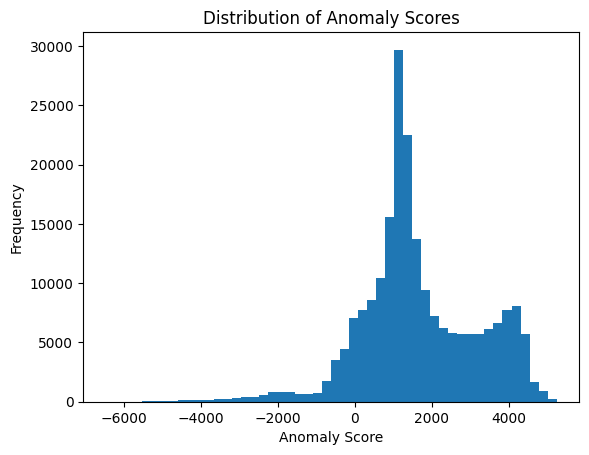

In [34]:
plt.hist(data_with_scores['Anomaly Score'], bins=50)
plt.title('Distribution of Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.show()


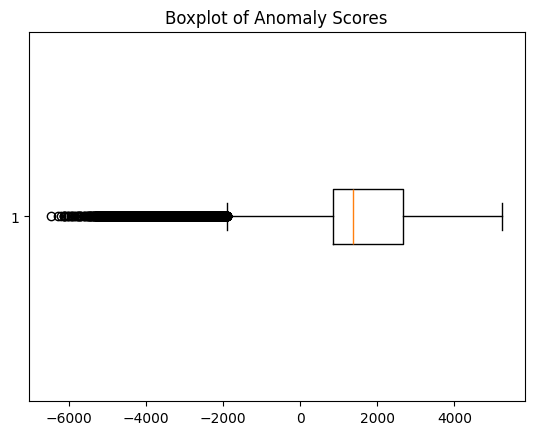

In [35]:
# Boxplot to view outliers
plt.boxplot(data_with_scores['Anomaly Score'], vert=False)
plt.title('Boxplot of Anomaly Scores')
plt.show()

In [36]:
# find threshold of anomaly scores
threshold = np.percentile(anomaly_scores, 0.17)
threshold


-4471.852262276708

In [49]:
# use threshold to identifind the anomaly behavior
data_with_scores['Is_Anomaly'] = anomaly_scores < threshold

data_with_scores


,Account No,Balance,Amount,Third Party Name,month_day,Holiday,Anomaly Score,Is_Anomaly
0,678330503.0,2971.000000,1584.00,Westport Care Home,01-01,True,-792.287670,False
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,01-01,True,-1340.526017,False
2,624500124.0,3226.000000,1825.00,Fat Face,01-01,True,-1049.382465,False
3,768271776.0,3620.000000,1950.00,A Cut Above,01-01,True,-1494.421307,False
4,456221621.0,2831.000000,1675.00,Tesco,01-01,True,-653.651521,False
...,...,...,...,...,...,...,...,...
215688,581655972.0,45935.206861,-41.06,Tesco,12-06,False,-5155.146694,True
215689,786141370.0,-244.837500,-62.35,Sainsbury Local,12-06,False,357.993964,False
215690,824916823.0,9709.172159,-32.94,Deliveroo,12-06,False,3662.274368,False
215691,366550080.0,26834.165794,-19.25,Amazon,12-06,False,-2082.493073,False


In [ ]:
# neg[neg['Account No']==581655972.0]

In [38]:
data_with_scores[(data_with_scores['Is_Anomaly'] == True) & (data_with_scores['Amount']<=0)] 

,Account No,Balance,Amount,Third Party Name,month_day,Holiday,Anomaly Score,Is_Anomaly
134359,581655972.0,34586.591810,-222.60,Topshop,08-09,False,-5151.219273,True
149493,581655972.0,38608.076002,-64.82,Coop Local,09-01,False,-4791.155099,True
152843,581655972.0,38348.224526,-93.42,Tesco,09-06,False,-4873.022812,True
153255,581655972.0,38273.844619,-74.38,Coop Local,09-07,False,-4851.964784,True
153526,581655972.0,38142.244619,-131.60,Fat Face,09-07,False,-5163.228026,True
...,...,...,...,...,...,...,...,...
214750,581655972.0,45982.164323,-21.73,Selfridges,12-05,False,-5003.325214,True
214846,581655972.0,45976.264323,-5.90,Coffee #1,12-05,False,-4873.600437,True
215236,975345315.0,40981.620578,-15.11,Amazon,12-06,False,-4495.411089,True
215684,975345315.0,40907.910578,-73.71,Tesco,12-06,False,-4995.186774,True


In [39]:
# clean_data = clean_data[['Account No', 'DateTime', 'Balance', 'Amount']]
# clean_data


In [51]:
clean_data

,Account No,Balance,Amount,Third Party Name,DateTime
0,678330503.0,2971.000000,1584.00,Westport Care Home,2023-01-01 00:00:00
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,2023-01-01 00:00:00
2,472213568.0,3012.000000,-780.00,NaN,2023-01-01 00:00:00
3,283027736.0,1787.000000,780.00,NaN,2023-01-01 00:00:00
4,624500124.0,3226.000000,1825.00,Fat Face,2023-01-01 00:00:00
...,...,...,...,...,...
230190,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54:00
230191,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55:00
230192,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05:00
230193,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13:00


In [53]:
data_with_scores = pd.merge(clean_data, data_with_scores, on=['Account No', 'Balance', 'Amount', 'Third Party Name'], how='inner')
data_with_scores



,Account No,Balance,Amount,Third Party Name,DateTime,month_day,Holiday,Anomaly Score,Is_Anomaly
0,678330503.0,2971.000000,1584.00,Westport Care Home,2023-01-01 00:00:00,01-01,True,-792.287670,False
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,2023-01-01 00:00:00,01-01,True,-1340.526017,False
2,624500124.0,3226.000000,1825.00,Fat Face,2023-01-01 00:00:00,01-01,True,-1049.382465,False
3,768271776.0,3620.000000,1950.00,A Cut Above,2023-01-01 00:00:00,01-01,True,-1494.421307,False
4,456221621.0,2831.000000,1675.00,Tesco,2023-01-01 00:00:00,01-01,True,-653.651521,False
...,...,...,...,...,...,...,...,...,...
215688,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54:00,12-06,False,-5155.146694,True
215689,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55:00,12-06,False,357.993964,False
215690,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05:00,12-06,False,3662.274368,False
215691,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13:00,12-06,False,-2082.493073,False


In [54]:
data_with_scores['DateTime'] = pd.to_datetime(data_with_scores['DateTime'])
data_with_scores

,Account No,Balance,Amount,Third Party Name,DateTime,month_day,Holiday,Anomaly Score,Is_Anomaly
0,678330503.0,2971.000000,1584.00,Westport Care Home,2023-01-01 00:00:00,01-01,True,-792.287670,False
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,2023-01-01 00:00:00,01-01,True,-1340.526017,False
2,624500124.0,3226.000000,1825.00,Fat Face,2023-01-01 00:00:00,01-01,True,-1049.382465,False
3,768271776.0,3620.000000,1950.00,A Cut Above,2023-01-01 00:00:00,01-01,True,-1494.421307,False
4,456221621.0,2831.000000,1675.00,Tesco,2023-01-01 00:00:00,01-01,True,-653.651521,False
...,...,...,...,...,...,...,...,...,...
215688,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54:00,12-06,False,-5155.146694,True
215689,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55:00,12-06,False,357.993964,False
215690,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05:00,12-06,False,3662.274368,False
215691,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13:00,12-06,False,-2082.493073,False


In [55]:
data_with_scores['DayofWeek'] = data_with_scores['DateTime'].dt.weekday
data_with_scores['HourOfDay'] = data_with_scores['DateTime'].dt.hour
data_with_scores['IsWeekend'] = data_with_scores['DayofWeek'].isin([5, 6])

In [56]:
data_with_scores[data_with_scores['Is_Anomaly']==True]

,Account No,Balance,Amount,Third Party Name,DateTime,month_day,Holiday,Anomaly Score,Is_Anomaly,DayofWeek,HourOfDay,IsWeekend
19167,822718326.0,2743.244447,3333.00,Boots,2023-01-31 00:00:00,01-31,False,-5192.607388,True,1,0,False
19169,647472692.0,4316.963700,4779.00,University College Hospital,2023-01-31 00:00:00,01-31,False,-5266.308665,True,1,0,False
19177,996042490.0,3852.482546,3750.00,Lloyds Pharmacy,2023-01-31 00:00:00,01-31,False,-4756.534090,True,1,0,False
19183,785749304.0,2520.721500,2870.00,Pets at Home,2023-01-31 00:00:00,01-31,False,-4633.953586,True,1,0,False
19187,556992209.0,2790.587900,3333.00,Lloyds Pharmacy,2023-01-31 00:00:00,01-31,False,-5154.529189,True,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
214750,581655972.0,45982.164323,-21.73,Selfridges,2023-12-05 06:07:00,12-05,False,-5003.325214,True,1,6,False
214846,581655972.0,45976.264323,-5.90,Coffee #1,2023-12-05 09:03:00,12-05,False,-4873.600437,True,1,9,False
215236,975345315.0,40981.620578,-15.11,Amazon,2023-12-06 05:27:00,12-06,False,-4495.411089,True,2,5,False
215684,975345315.0,40907.910578,-73.71,Tesco,2023-12-06 20:40:00,12-06,False,-4995.186774,True,2,20,False


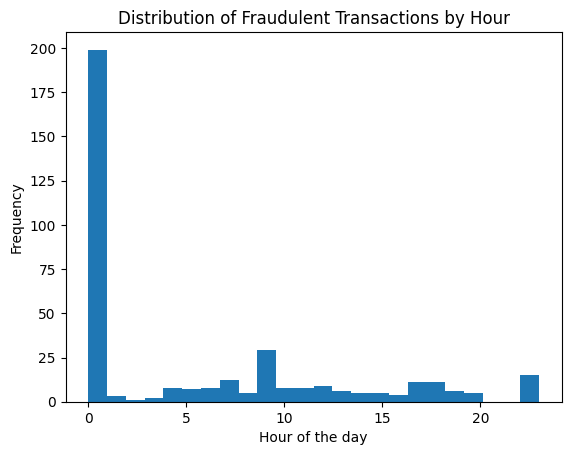

In [57]:
plt.hist(data_with_scores.loc[data_with_scores['Is_Anomaly'], 'HourOfDay'], bins=24)
plt.xlabel('Hour of the day')
plt.ylabel('Frequency')
plt.title('Distribution of Fraudulent Transactions by Hour')
plt.show()


In [78]:
flagged_df = data_with_scores[data_with_scores['Is_Anomaly']]


In [84]:
data_with_scores[data_with_scores['Amount']==0]

,Account No,Balance,Amount,Third Party Name,DateTime,month_day,Holiday,Anomaly Score,Is_Anomaly,DayofWeek,HourOfDay,IsWeekend
115653,950234174.0,776.302067,-0.0,Selfridges,2023-07-11 08:21:00,07-11,False,1591.604522,False,1,8,False
124054,738958551.0,5564.249325,-0.0,Amazon,2023-07-29 18:32:00,07-29,False,4128.874153,False,5,18,True
125501,730002588.0,12939.954627,-0.0,Fat Face,2023-07-31 17:42:00,07-31,False,3589.034116,False,0,17,False
137032,581655972.0,34362.247639,-0.0,Fitted Stitch,2023-08-15 05:45:00,08-15,False,-3301.226280,False,1,5,False
157952,322221939.0,3186.856806,-0.0,Revella,2023-09-16 08:04:00,09-16,False,2939.058787,False,5,8,True
180821,912705941.0,17527.347189,-0.0,Tesco,2023-10-21 05:41:00,10-21,False,1767.412065,False,5,5,True
185661,520447032.0,7416.909870,-0.0,Lloyds Pharmacy,2023-10-30 09:22:00,10-30,False,4568.166015,False,0,9,False
199668,824916823.0,8591.033140,-0.0,Sainsbury Local,2023-11-16 05:47:00,11-16,False,4519.647862,False,3,5,False
206574,687135796.0,28698.757249,-0.0,Sainsbury,2023-11-29 07:29:00,11-29,False,-2158.543243,False,2,7,False


In [79]:
flagged_df = flagged_df[flagged_df['Amount']<=0]
flagged_df

,Account No,Balance,Amount,Third Party Name,DateTime,month_day,Holiday,Anomaly Score,Is_Anomaly,DayofWeek,HourOfDay,IsWeekend
134359,581655972.0,34586.591810,-222.60,Topshop,2023-08-09 18:08:00,08-09,False,-5151.219273,True,2,18,False
149493,581655972.0,38608.076002,-64.82,Coop Local,2023-09-01 08:24:00,09-01,False,-4791.155099,True,4,8,False
152843,581655972.0,38348.224526,-93.42,Tesco,2023-09-06 09:00:00,09-06,False,-4873.022812,True,2,9,False
153255,581655972.0,38273.844619,-74.38,Coop Local,2023-09-07 07:02:00,09-07,False,-4851.964784,True,3,7,False
153526,581655972.0,38142.244619,-131.60,Fat Face,2023-09-07 17:15:00,09-07,False,-5163.228026,True,3,17,False
...,...,...,...,...,...,...,...,...,...,...,...,...
214750,581655972.0,45982.164323,-21.73,Selfridges,2023-12-05 06:07:00,12-05,False,-5003.325214,True,1,6,False
214846,581655972.0,45976.264323,-5.90,Coffee #1,2023-12-05 09:03:00,12-05,False,-4873.600437,True,1,9,False
215236,975345315.0,40981.620578,-15.11,Amazon,2023-12-06 05:27:00,12-06,False,-4495.411089,True,2,5,False
215684,975345315.0,40907.910578,-73.71,Tesco,2023-12-06 20:40:00,12-06,False,-4995.186774,True,2,20,False


In [87]:
flagged_df

,Account No,Balance,Amount,Third Party Name,DateTime,month_day,Holiday,Anomaly Score,Is_Anomaly,DayofWeek,HourOfDay,IsWeekend
134359,581655972.0,34586.591810,-222.60,Topshop,2023-08-09 18:08:00,08-09,False,-5151.219273,True,2,18,False
149493,581655972.0,38608.076002,-64.82,Coop Local,2023-09-01 08:24:00,09-01,False,-4791.155099,True,4,8,False
152843,581655972.0,38348.224526,-93.42,Tesco,2023-09-06 09:00:00,09-06,False,-4873.022812,True,2,9,False
153255,581655972.0,38273.844619,-74.38,Coop Local,2023-09-07 07:02:00,09-07,False,-4851.964784,True,3,7,False
153526,581655972.0,38142.244619,-131.60,Fat Face,2023-09-07 17:15:00,09-07,False,-5163.228026,True,3,17,False
...,...,...,...,...,...,...,...,...,...,...,...,...
214750,581655972.0,45982.164323,-21.73,Selfridges,2023-12-05 06:07:00,12-05,False,-5003.325214,True,1,6,False
214846,581655972.0,45976.264323,-5.90,Coffee #1,2023-12-05 09:03:00,12-05,False,-4873.600437,True,1,9,False
215236,975345315.0,40981.620578,-15.11,Amazon,2023-12-06 05:27:00,12-06,False,-4495.411089,True,2,5,False
215684,975345315.0,40907.910578,-73.71,Tesco,2023-12-06 20:40:00,12-06,False,-4995.186774,True,2,20,False


In [86]:
len(flagged_df['Account No'].unique())

5

In [80]:
# flagged_df = data_with_scores[data_with_scores['Is_Anomaly']]

# find the most common values for certain columns
common_third_party_names = flagged_df['Third Party Name'].value_counts()
common_days = flagged_df['DayofWeek'].value_counts()
common_hours = flagged_df['HourOfDay'].value_counts()
common_weekend_status = flagged_df['IsWeekend'].value_counts()

print("Common Third Party Names in Flagged Transactions:\n", common_third_party_names)



Common Third Party Names in Flagged Transactions:
 Third Party Name
Tesco              23
Topshop            15
Matalan            15
Loosely Fitted     14
The Works          12
Selfridges          9
Amazon              8
Coffee #1           8
Sports Direct       7
Netflix             5
PureGym             5
Fitted Stitch       5
Coop Local          5
Revella             5
Sainsbury Local     4
Fat Face            4
AMAZON              4
Etsy                3
Blizzard            3
Five Senses Art     2
Sainsbury           2
Lloyds Pharmacy     2
Grand Union BJJ     2
Boots               2
Hobby Lobby         1
Starbucks           1
Reebok              1
Deliveroo           1
Name: count, dtype: int64


In [81]:
print("\nCommon Days of Week in Flagged Transactions:\n", common_days)
print("\nCommon Hours of Day in Flagged Transactions:\n", common_hours)
print("\nIs it Commonly on Weekends?:\n", common_weekend_status)


Common Days of Week in Flagged Transactions:
 DayofWeek
6    51
3    29
5    28
2    20
0    16
4    12
1    12
Name: count, dtype: int64

Common Hours of Day in Flagged Transactions:
 HourOfDay
9     29
23    15
7     12
18    11
17    11
12     9
6      8
4      8
11     8
10     8
5      7
19     6
13     6
8      5
14     5
15     5
20     5
16     4
1      3
3      2
2      1
Name: count, dtype: int64

Is it Commonly on Weekends?:
 IsWeekend
False    89
True     79
Name: count, dtype: int64


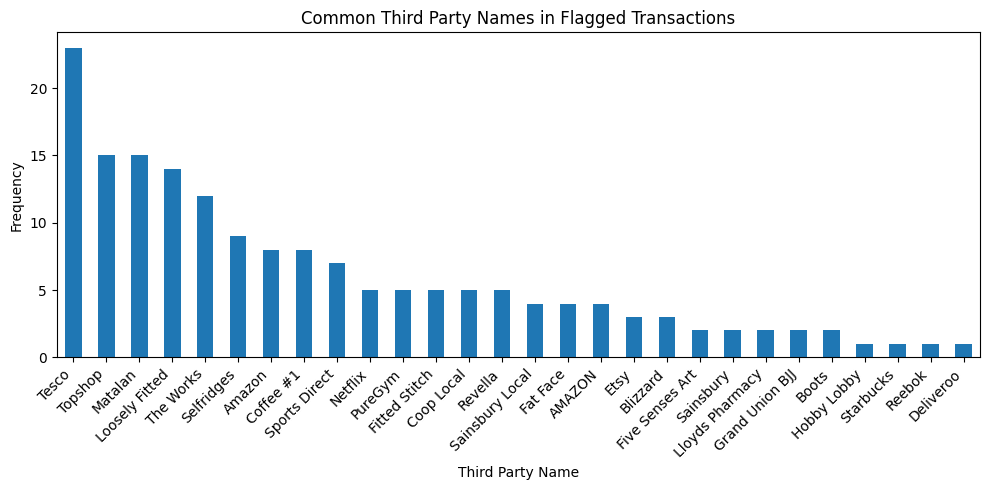

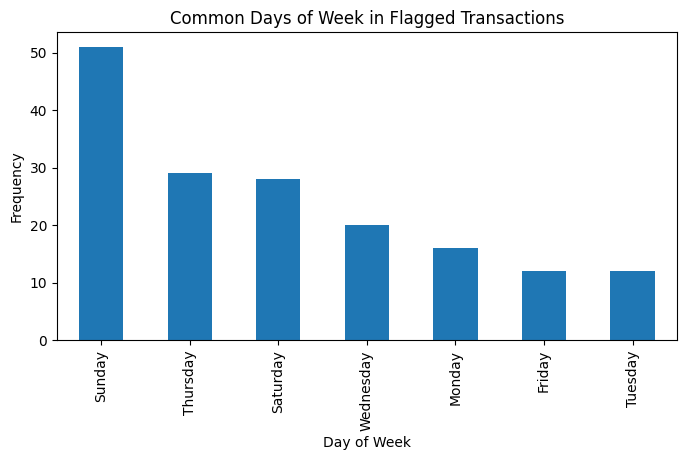

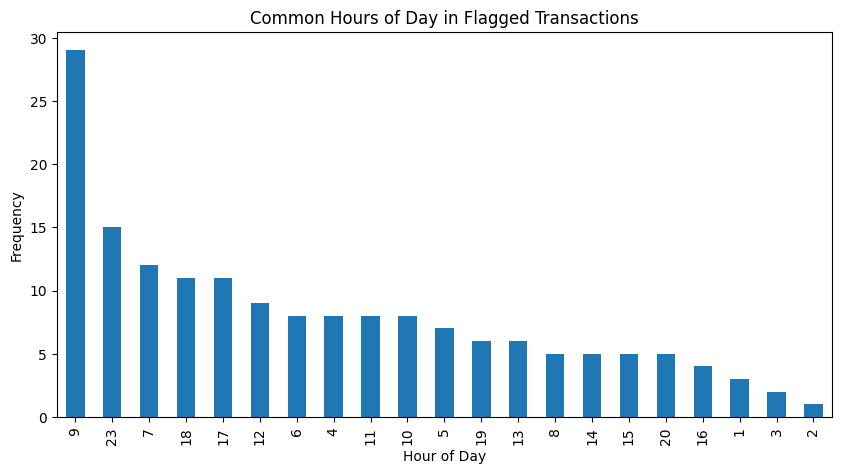

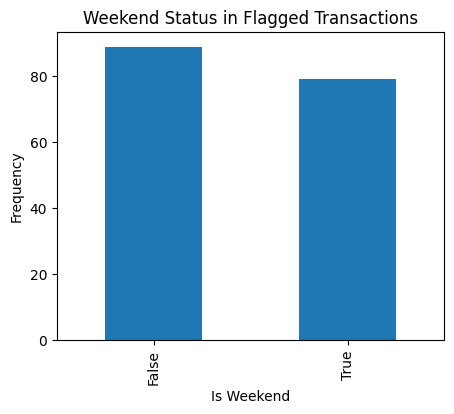

In [69]:
plt.figure(figsize=(10, 5))
common_third_party_names.plot(kind='bar')
plt.title('Common Third Party Names in Flagged Transactions')
plt.xlabel('Third Party Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

day_of_week_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
common_days.index = common_days.index.map(day_of_week_map)

plt.figure(figsize=(8, 4))
common_days.plot(kind='bar')
plt.title('Common Days of Week in Flagged Transactions')
plt.xlabel('Day of Week')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
common_hours.plot(kind='bar')
plt.title('Common Hours of Day in Flagged Transactions')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(5, 4))
common_weekend_status.plot(kind='bar')
plt.title('Weekend Status in Flagged Transactions')
plt.xlabel('Is Weekend')
plt.ylabel('Frequency')
plt.show()


In [82]:
flagged_df[flagged_df['Amount']==0.00]

,Account No,Balance,Amount,Third Party Name,DateTime,month_day,Holiday,Anomaly Score,Is_Anomaly,DayofWeek,HourOfDay,IsWeekend


In [70]:
data_with_scores

,Account No,Balance,Amount,Third Party Name,DateTime,month_day,Holiday,Anomaly Score,Is_Anomaly,DayofWeek,HourOfDay,IsWeekend
0,678330503.0,2971.000000,1584.00,Westport Care Home,2023-01-01 00:00:00,01-01,True,-792.287670,False,6,0,True
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,2023-01-01 00:00:00,01-01,True,-1340.526017,False,6,0,True
2,624500124.0,3226.000000,1825.00,Fat Face,2023-01-01 00:00:00,01-01,True,-1049.382465,False,6,0,True
3,768271776.0,3620.000000,1950.00,A Cut Above,2023-01-01 00:00:00,01-01,True,-1494.421307,False,6,0,True
4,456221621.0,2831.000000,1675.00,Tesco,2023-01-01 00:00:00,01-01,True,-653.651521,False,6,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
215688,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54:00,12-06,False,-5155.146694,True,2,20,False
215689,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55:00,12-06,False,357.993964,False,2,20,False
215690,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05:00,12-06,False,3662.274368,False,2,21,False
215691,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13:00,12-06,False,-2082.493073,False,2,21,False


In [88]:
anomalous_transactions = flagged_df.copy()
anomalous_transactions

,Account No,Balance,Amount,Third Party Name,DateTime,month_day,Holiday,Anomaly Score,Is_Anomaly,DayofWeek,HourOfDay,IsWeekend
134359,581655972.0,34586.591810,-222.60,Topshop,2023-08-09 18:08:00,08-09,False,-5151.219273,True,2,18,False
149493,581655972.0,38608.076002,-64.82,Coop Local,2023-09-01 08:24:00,09-01,False,-4791.155099,True,4,8,False
152843,581655972.0,38348.224526,-93.42,Tesco,2023-09-06 09:00:00,09-06,False,-4873.022812,True,2,9,False
153255,581655972.0,38273.844619,-74.38,Coop Local,2023-09-07 07:02:00,09-07,False,-4851.964784,True,3,7,False
153526,581655972.0,38142.244619,-131.60,Fat Face,2023-09-07 17:15:00,09-07,False,-5163.228026,True,3,17,False
...,...,...,...,...,...,...,...,...,...,...,...,...
214750,581655972.0,45982.164323,-21.73,Selfridges,2023-12-05 06:07:00,12-05,False,-5003.325214,True,1,6,False
214846,581655972.0,45976.264323,-5.90,Coffee #1,2023-12-05 09:03:00,12-05,False,-4873.600437,True,1,9,False
215236,975345315.0,40981.620578,-15.11,Amazon,2023-12-06 05:27:00,12-06,False,-4495.411089,True,2,5,False
215684,975345315.0,40907.910578,-73.71,Tesco,2023-12-06 20:40:00,12-06,False,-4995.186774,True,2,20,False


In [89]:
len(anomalous_transactions['Account No'].unique())

5

In [90]:
summary_stats = anomalous_transactions['Amount'].describe()
print(summary_stats)

count    168.000000
mean     -89.573036
std       83.689243
min     -354.200000
25%     -132.587500
50%      -64.960000
75%      -20.722500
max       -1.610000
Name: Amount, dtype: float64


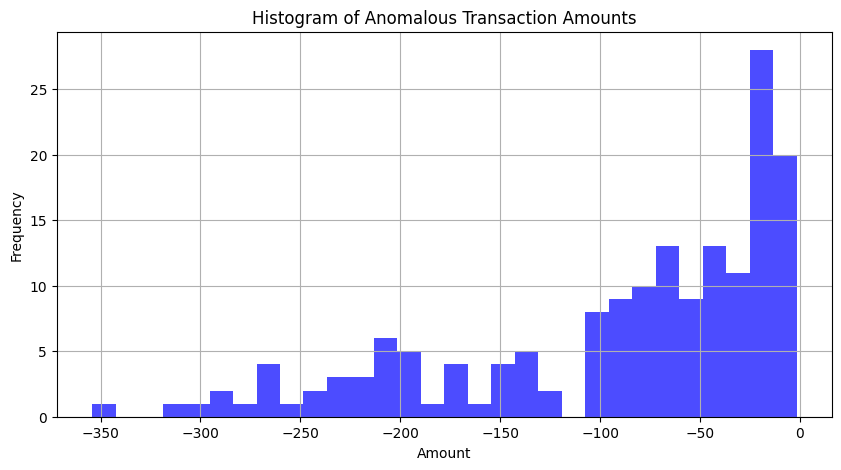

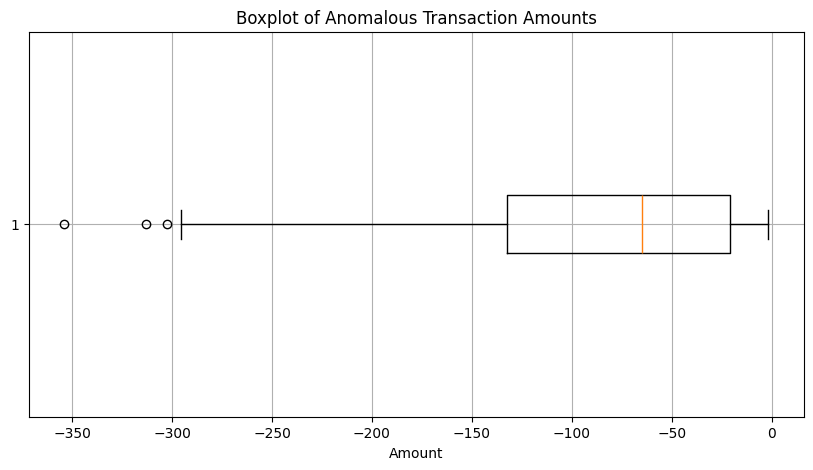

In [91]:
plt.figure(figsize=(10, 5))
plt.hist(anomalous_transactions['Amount'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Anomalous Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.boxplot(anomalous_transactions['Amount'], vert=False)
plt.title('Boxplot of Anomalous Transaction Amounts')
plt.xlabel('Amount')
plt.grid(True)
plt.show()


In [92]:
anomalous_transactions[anomalous_transactions['Account No'] == 581655972.0]

,Account No,Balance,Amount,Third Party Name,DateTime,month_day,Holiday,Anomaly Score,Is_Anomaly,DayofWeek,HourOfDay,IsWeekend
134359,581655972.0,34586.591810,-222.60,Topshop,2023-08-09 18:08:00,08-09,False,-5151.219273,True,2,18,False
149493,581655972.0,38608.076002,-64.82,Coop Local,2023-09-01 08:24:00,09-01,False,-4791.155099,True,4,8,False
152843,581655972.0,38348.224526,-93.42,Tesco,2023-09-06 09:00:00,09-06,False,-4873.022812,True,2,9,False
153255,581655972.0,38273.844619,-74.38,Coop Local,2023-09-07 07:02:00,09-07,False,-4851.964784,True,3,7,False
153526,581655972.0,38142.244619,-131.60,Fat Face,2023-09-07 17:15:00,09-07,False,-5163.228026,True,3,17,False
...,...,...,...,...,...,...,...,...,...,...,...,...
213942,581655972.0,46010.393429,-48.11,Topshop,2023-12-04 02:18:00,12-04,False,-5246.437349,True,0,2,False
214155,581655972.0,46003.893429,-6.50,Coffee #1,2023-12-04 09:08:00,12-04,False,-4883.217672,True,0,9,False
214750,581655972.0,45982.164323,-21.73,Selfridges,2023-12-05 06:07:00,12-05,False,-5003.325214,True,1,6,False
214846,581655972.0,45976.264323,-5.90,Coffee #1,2023-12-05 09:03:00,12-05,False,-4873.600437,True,1,9,False


# find threshold for large amouth


In [93]:
data

,Account No,Balance,Amount,Third Party Name,month_day,Holiday
0,678330503.0,2971.000000,1584.00,Westport Care Home,01-01,True
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,01-01,True
2,624500124.0,3226.000000,1825.00,Fat Face,01-01,True
3,768271776.0,3620.000000,1950.00,A Cut Above,01-01,True
4,456221621.0,2831.000000,1675.00,Tesco,01-01,True
...,...,...,...,...,...,...
215688,581655972.0,45935.206861,-41.06,Tesco,12-06,False
215689,786141370.0,-244.837500,-62.35,Sainsbury Local,12-06,False
215690,824916823.0,9709.172159,-32.94,Deliveroo,12-06,False
215691,366550080.0,26834.165794,-19.25,Amazon,12-06,False


In [94]:
# cal mean and standard deviation for each third party
stats = data.groupby('Third Party Name')['Amount'].agg(['mean', 'std']).reset_index()
stats['Upper_Threshold'] = stats['mean'] + 3 * stats['std']
stats['Lower_Threshold'] = stats['mean'] - 3 * stats['std']

In [95]:
stats

,Third Party Name,mean,std,Upper_Threshold,Lower_Threshold
0,A Cut Above,1825.377320,343.399556,2855.575987,795.178652
1,A Yarn Story,323.090227,686.846789,2383.630595,-1737.450140
2,AMAZON,-23.595310,19.768335,35.709696,-82.900316
3,Amazon,-16.259539,16.210770,32.372772,-64.891851
4,Barbiee Boutique,1861.672131,330.441761,2852.997414,870.346848
...,...,...,...,...,...
76,Victoria Park,1581.003077,562.166461,3267.502460,-105.496306
77,Vision Express,2125.208556,374.516311,3248.757488,1001.659624
78,Westport Care Home,1716.029412,111.359299,2050.107309,1381.951515
79,Wool,-20.171848,22.784115,48.180498,-88.524193


In [96]:
#  thresholds for unusual times and large amounts
unusual_hour_start = 0  # Midnight
unusual_hour_end = 5    # 5 AM
large_amount_threshold = 200 

anomalous_transactions = anomalous_transactions.merge(stats[['Third Party Name', 'Upper_Threshold', 'Lower_Threshold']], on='Third Party Name', how='left')

# flag transactions based on the calculated thresholds
anomalous_transactions['Unusual_Hour'] = anomalous_transactions['HourOfDay'].apply(lambda x: unusual_hour_start <= x <= unusual_hour_end)
anomalous_transactions['Large_Amount'] = anomalous_transactions.apply(lambda row: row['Amount'] > row['Upper_Threshold'] or row['Amount'] < row['Lower_Threshold'], axis=1)
anomalous_transactions['Potential_Fraud'] = anomalous_transactions.apply(lambda row: row['Is_Anomaly'] and (row['Unusual_Hour'] or row['Large_Amount']), axis=1)

# filter and display potentially fraudulent transactions
flagged_transactions = anomalous_transactions[anomalous_transactions['Potential_Fraud']]
flagged_transactions

,Account No,Balance,Amount,Third Party Name,DateTime,month_day,Holiday,Anomaly Score,Is_Anomaly,DayofWeek,HourOfDay,IsWeekend,Upper_Threshold,Lower_Threshold,Unusual_Hour,Large_Amount,Potential_Fraud
5,581655972.0,37987.024982,-70.87,Amazon,2023-09-11 03:43:00,09-11,False,-4793.089780,True,0,3,False,32.372772,-64.891851,True,True,True
8,581655972.0,37261.610183,-65.51,Sainsbury Local,2023-09-25 01:55:00,09-25,False,-4616.386206,True,0,1,False,86.367927,-171.145398,True,False,True
27,581655972.0,39826.968423,-42.80,Boots,2023-10-02 01:28:00,10-02,False,-4677.766397,True,0,1,False,2621.543785,-2232.439771,True,False,True
29,581655972.0,39672.198903,-55.46,Selfridges,2023-10-07 05:02:00,10-07,False,-4758.448532,True,5,5,True,1268.265392,-1198.648694,True,False,True
44,581655972.0,39039.563495,-54.70,Amazon,2023-10-20 04:07:00,10-20,False,-4744.779945,True,4,4,False,32.372772,-64.891851,True,False,True
49,581655972.0,38756.344072,-86.29,Tesco,2023-10-23 04:07:00,10-23,False,-4857.771938,True,0,4,False,318.866431,-452.932056,True,False,True
52,975345315.0,38199.027239,-50.04,Fitted Stitch,2023-10-31 05:47:00,10-31,False,-4525.315839,True,1,5,False,1144.417137,-1098.666245,True,False,True
56,581655972.0,43639.537696,-12.81,Revella,2023-11-01 05:05:00,11-01,False,-4660.521755,True,2,5,False,133.885771,-307.495398,True,False,True
62,581655972.0,43556.860514,-3.91,Loosely Fitted,2023-11-04 04:44:00,11-04,False,-4587.962244,True,5,4,True,122.471889,-240.963713,True,False,True
63,558119802.0,35315.406254,-87.56,Etsy,2023-11-04 04:51:00,11-04,False,-4603.319114,True,5,4,True,36.394951,-83.169640,True,True,True


In [97]:
flagged_transactions = flagged_transactions[(flagged_transactions['Potential_Fraud']) & (flagged_transactions['Amount']<=0)]
flagged_transactions

,Account No,Balance,Amount,Third Party Name,DateTime,month_day,Holiday,Anomaly Score,Is_Anomaly,DayofWeek,HourOfDay,IsWeekend,Upper_Threshold,Lower_Threshold,Unusual_Hour,Large_Amount,Potential_Fraud
5,581655972.0,37987.024982,-70.87,Amazon,2023-09-11 03:43:00,09-11,False,-4793.089780,True,0,3,False,32.372772,-64.891851,True,True,True
8,581655972.0,37261.610183,-65.51,Sainsbury Local,2023-09-25 01:55:00,09-25,False,-4616.386206,True,0,1,False,86.367927,-171.145398,True,False,True
27,581655972.0,39826.968423,-42.80,Boots,2023-10-02 01:28:00,10-02,False,-4677.766397,True,0,1,False,2621.543785,-2232.439771,True,False,True
29,581655972.0,39672.198903,-55.46,Selfridges,2023-10-07 05:02:00,10-07,False,-4758.448532,True,5,5,True,1268.265392,-1198.648694,True,False,True
44,581655972.0,39039.563495,-54.70,Amazon,2023-10-20 04:07:00,10-20,False,-4744.779945,True,4,4,False,32.372772,-64.891851,True,False,True
49,581655972.0,38756.344072,-86.29,Tesco,2023-10-23 04:07:00,10-23,False,-4857.771938,True,0,4,False,318.866431,-452.932056,True,False,True
52,975345315.0,38199.027239,-50.04,Fitted Stitch,2023-10-31 05:47:00,10-31,False,-4525.315839,True,1,5,False,1144.417137,-1098.666245,True,False,True
56,581655972.0,43639.537696,-12.81,Revella,2023-11-01 05:05:00,11-01,False,-4660.521755,True,2,5,False,133.885771,-307.495398,True,False,True
62,581655972.0,43556.860514,-3.91,Loosely Fitted,2023-11-04 04:44:00,11-04,False,-4587.962244,True,5,4,True,122.471889,-240.963713,True,False,True
63,558119802.0,35315.406254,-87.56,Etsy,2023-11-04 04:51:00,11-04,False,-4603.319114,True,5,4,True,36.394951,-83.169640,True,True,True


In [98]:
flagged_transactions.shape

(28, 17)

In [99]:
len(flagged_transactions['Account No'].unique())

4

In [100]:
# show stats of 'Third Party Name'
transaction_stats = flagged_transactions.groupby('Account No').agg({
    'Amount': ['mean', 'std', 'count', 'sum'],
    'Anomaly Score': ['mean', 'min', 'max']
}).reset_index()

transaction_stats


Account No      Amount                            Anomaly Score  \
                      mean         std count      sum          mean   
0  558119802.0 -133.116667  120.260773     3  -399.35  -5038.779829   
1  581655972.0  -62.632500   80.747276    16 -1002.12  -4921.724718   
2  639409800.0 -114.886667  143.472837     3  -344.66  -5070.862626   
3  975345315.0  -56.441667   72.049255     6  -338.65  -4727.712570   

                             
           min          max  
0 -5933.752816 -4579.267557  
1 -6468.700845 -4587.962244  
2 -5866.072355 -4476.170710  
3 -5499.897858 -4495.411089

In [102]:
flagged_transactions

,Account No,Balance,Amount,Third Party Name,DateTime,month_day,Holiday,Anomaly Score,Is_Anomaly,DayofWeek,HourOfDay,IsWeekend,Upper_Threshold,Lower_Threshold,Unusual_Hour,Large_Amount,Potential_Fraud
5,581655972.0,37987.024982,-70.87,Amazon,2023-09-11 03:43:00,09-11,False,-4793.089780,True,0,3,False,32.372772,-64.891851,True,True,True
8,581655972.0,37261.610183,-65.51,Sainsbury Local,2023-09-25 01:55:00,09-25,False,-4616.386206,True,0,1,False,86.367927,-171.145398,True,False,True
27,581655972.0,39826.968423,-42.80,Boots,2023-10-02 01:28:00,10-02,False,-4677.766397,True,0,1,False,2621.543785,-2232.439771,True,False,True
29,581655972.0,39672.198903,-55.46,Selfridges,2023-10-07 05:02:00,10-07,False,-4758.448532,True,5,5,True,1268.265392,-1198.648694,True,False,True
44,581655972.0,39039.563495,-54.70,Amazon,2023-10-20 04:07:00,10-20,False,-4744.779945,True,4,4,False,32.372772,-64.891851,True,False,True
49,581655972.0,38756.344072,-86.29,Tesco,2023-10-23 04:07:00,10-23,False,-4857.771938,True,0,4,False,318.866431,-452.932056,True,False,True
52,975345315.0,38199.027239,-50.04,Fitted Stitch,2023-10-31 05:47:00,10-31,False,-4525.315839,True,1,5,False,1144.417137,-1098.666245,True,False,True
56,581655972.0,43639.537696,-12.81,Revella,2023-11-01 05:05:00,11-01,False,-4660.521755,True,2,5,False,133.885771,-307.495398,True,False,True
62,581655972.0,43556.860514,-3.91,Loosely Fitted,2023-11-04 04:44:00,11-04,False,-4587.962244,True,5,4,True,122.471889,-240.963713,True,False,True
63,558119802.0,35315.406254,-87.56,Etsy,2023-11-04 04:51:00,11-04,False,-4603.319114,True,5,4,True,36.394951,-83.169640,True,True,True


In [106]:
flagged_transactions[flagged_transactions['Account No'] == 975345315.0]

,Account No,Balance,Amount,Third Party Name,DateTime,month_day,Holiday,Anomaly Score,Is_Anomaly,DayofWeek,HourOfDay,IsWeekend,Upper_Threshold,Lower_Threshold,Unusual_Hour,Large_Amount,Potential_Fraud
52,975345315.0,38199.027239,-50.04,Fitted Stitch,2023-10-31 05:47:00,10-31,False,-4525.315839,True,1,5,False,1144.417137,-1098.666245,True,False,True
123,975345315.0,36185.367755,-199.98,Reebok,2023-11-25 09:16:00,11-25,False,-5499.897858,True,5,9,True,63.463506,-185.330325,False,True,True
141,975345315.0,41137.093891,-14.99,Blizzard,2023-11-30 23:59:00,11-30,False,-4511.365367,True,3,23,False,-14.990000,-14.990000,False,True,True
142,975345315.0,41115.103891,-14.99,Blizzard,2023-11-30 23:59:00,11-30,False,-4508.904216,True,3,23,False,-14.990000,-14.990000,False,True,True
154,975345315.0,41035.204565,-43.54,Sainsbury Local,2023-12-03 01:08:00,12-03,False,-4825.381054,True,6,1,True,86.367927,-171.145398,True,False,True
165,975345315.0,40981.620578,-15.11,Amazon,2023-12-06 05:27:00,12-06,False,-4495.411089,True,2,5,False,32.372772,-64.891851,True,False,True


In [107]:
data[data['Account No'] == 975345315.0]

,Account No,Balance,Amount,Third Party Name,month_day,Holiday
949,975345315.0,327.010000,-18.99,PureGym,01-01,True
950,975345315.0,311.020000,-15.99,Netflix,01-01,True
951,975345315.0,298.030000,-12.99,SquareOnix,01-01,True
952,975345315.0,292.040000,-5.99,Mojang Studios,01-01,True
953,975345315.0,277.050000,-14.99,Blizzard,01-01,True
...,...,...,...,...,...,...
213087,975345315.0,41078.744849,-29.50,Tesco,12-02,False
213338,975345315.0,41035.204565,-43.54,Sainsbury Local,12-03,False
214587,975345315.0,40996.732565,-38.47,Tesco,12-04,False
215236,975345315.0,40981.620578,-15.11,Amazon,12-06,False


Common Third Party Names in Flagged Transactions:
 Third Party Name
Amazon             6
Revella            3
Loosely Fitted     3
Blizzard           3
Sainsbury Local    2
Selfridges         2
Etsy               2
Boots              1
Tesco              1
Fitted Stitch      1
Sainsbury          1
Reebok             1
AMAZON             1
Topshop            1
Name: count, dtype: int64


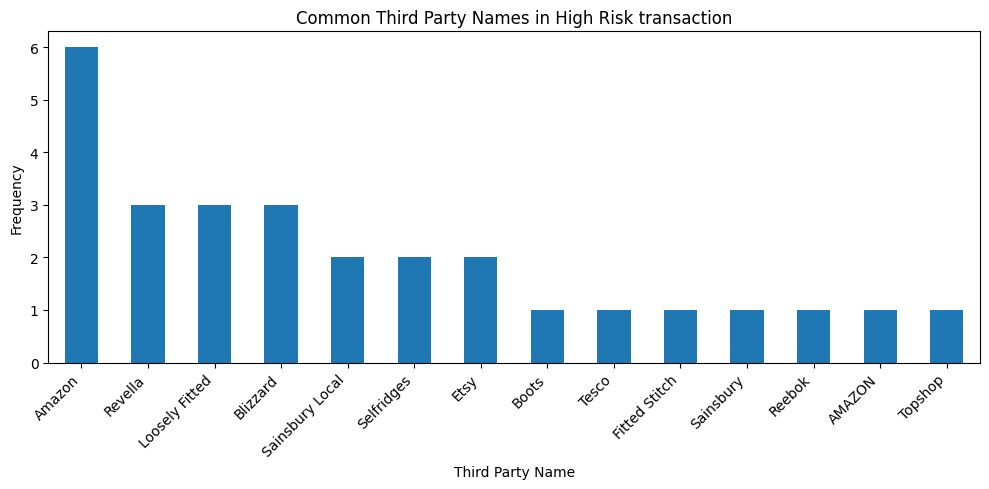

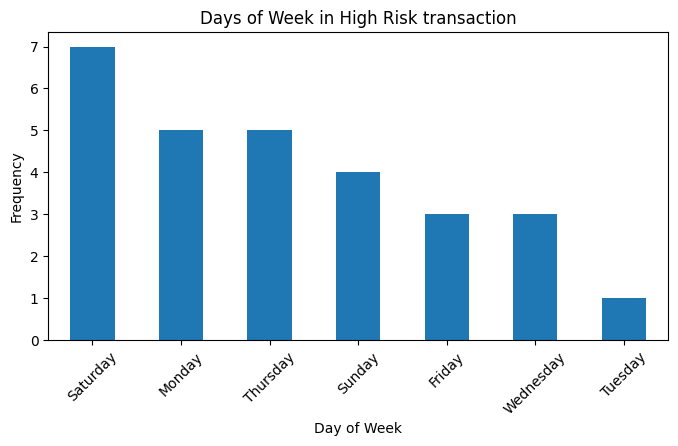

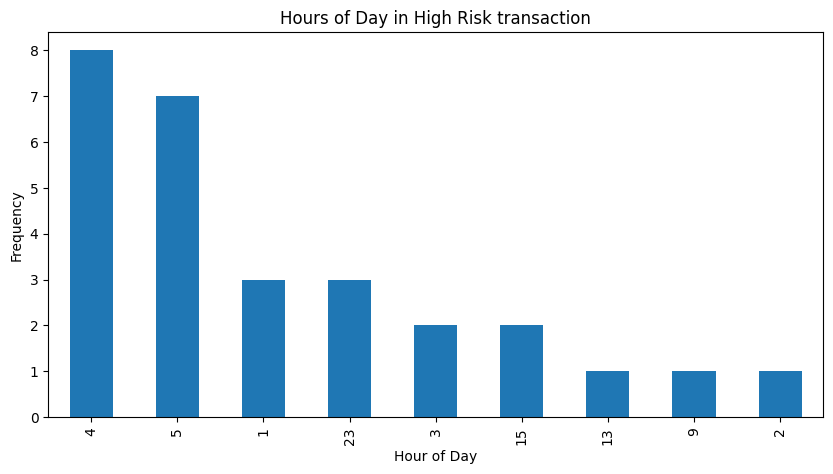

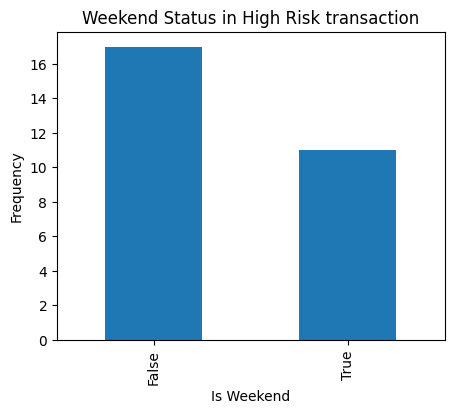

In [108]:
common_third_party_names = flagged_transactions['Third Party Name'].value_counts()
common_days = flagged_transactions['DayofWeek'].value_counts()
common_hours = flagged_transactions['HourOfDay'].value_counts()
common_weekend_status = flagged_transactions['IsWeekend'].value_counts()

print("Common Third Party Names in Flagged Transactions:\n", common_third_party_names)


plt.figure(figsize=(10, 5))
common_third_party_names.plot(kind='bar')
plt.title('Common Third Party Names in High Risk transaction')
plt.xlabel('Third Party Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

day_of_week_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
common_days.index = common_days.index.map(day_of_week_map)


plt.figure(figsize=(8, 4))
common_days.plot(kind='bar')
plt.title('Days of Week in High Risk transaction')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)  
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 5))
common_hours.plot(kind='bar')
plt.title('Hours of Day in High Risk transaction')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(5, 4))
common_weekend_status.plot(kind='bar')
plt.title('Weekend Status in High Risk transaction')
plt.xlabel('Is Weekend')
plt.ylabel('Frequency')
plt.show()
